In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import umap
import pandas as pd



url ="C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.data"  # laptop
url_2= "C:\\Users\\Дмитрий\\Desktop\\datasets\\bob\\soybean-large.names"  # laptop
url_3 = "C:\\Users\\Дмитрий\\Desktop\\datasets\\bob_2\\DrivFace\\drivPoints.csv"  # C:\Users\Дмитрий\Desktop\datasets\bob_2\DrivFace

In [7]:
col_names = [   "class","date", "plant-stand", "precip", "temp", "hail", "crop-hist", "area-damaged", "severity", "seed-tmt", "germination", "plant-growth", 
                "leaves","leafspots-halo", "leafspots-marg", "leafspot-size", "leaf-shread", "leaf-malf", "leaf-mild", "stem", "lodging", "stem-cankers",
                "canker-lesion", "fruiting-bodies", "external decay", "mycelium", "int-discolor", "sclerotia", "fruit-pods", "fruit spots", "seed",
                "mold-growth", "seed-discolor", "seed-size", "shriveling", "roots"  ]



In [41]:
pd.read_csv(url_3)

,fileName,subject,imgNum,label,ang,xF,yF,wF,hF,xRE,yRE,xLE,yLE,xN,yN,xRM,yRM,xLM,yLM
0,20130529_01_Driv_001_f,1,1,2,0,292,209,100,112,323,232,367,231,353,254,332,278,361,278
1,20130529_01_Driv_002_f,1,2,2,0,286,200,109,128,324,235,366,235,353,258,333,281,361,281
2,20130529_01_Driv_003_f,1,3,2,0,290,204,105,121,325,240,367,239,351,260,334,282,362,282
3,20130529_01_Driv_004_f,1,4,2,0,287,202,112,118,325,230,369,230,353,253,335,274,362,275
4,20130529_01_Driv_005_f,1,5,2,0,290,193,104,119,325,224,366,225,353,244,333,268,363,268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,20130530_04_Driv_086_f,4,86,2,-15,278,183,128,141,307,218,354,210,330,247,324,273,356,266
602,20130530_04_Driv_087_lr,4,87,1,-30,268,186,128,134,296,222,344,212,319,247,316,274,347,269
603,20130530_04_Driv_088_lr,4,88,1,-30,264,187,127,131,287,220,334,211,304,247,305,272,337,270
604,20130530_04_Driv_089_f,4,89,2,-15,264,175,143,136,295,207,345,200,320,234,314,261,351,251


In [42]:
import pandas as pd
bob = pd.read_csv(url, names=col_names)
color=list(bob)
bob=bob.replace("?",0)
bob=bob.dropna()

for i in list(bob):
    try:
        bob[i]=bob[i].str.strip() 
    except:
        print(i)

list_class=bob['class'].to_list()
dict_class={}
a=1
for i in list_class:
 
    if i not in dict_class.keys():
        dict_class[i]=a
        a+=1
# bob=bob.fillna(0)
bob=bob.dropna()
bob['class']=bob['class'].apply(lambda x: dict_class[x] )  
bob=bob.dropna()
np.array(bob['class'].to_list())


leaves


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14

In [31]:
X=bob[list(bob)[1:]].astype(int).to_numpy()
y=bob[list(bob)[1]].astype(int).to_numpy()


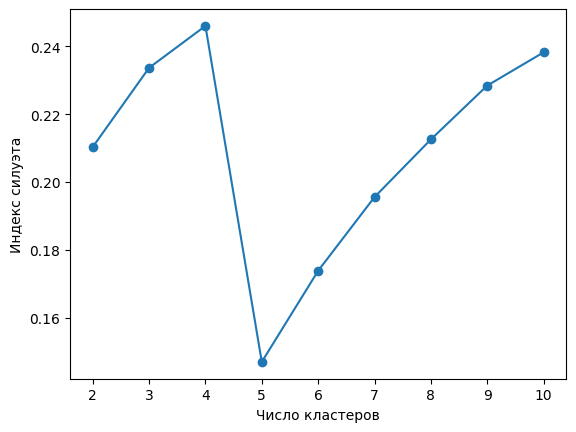

Лучшее число кластеров для иерархической кластеризации: 4


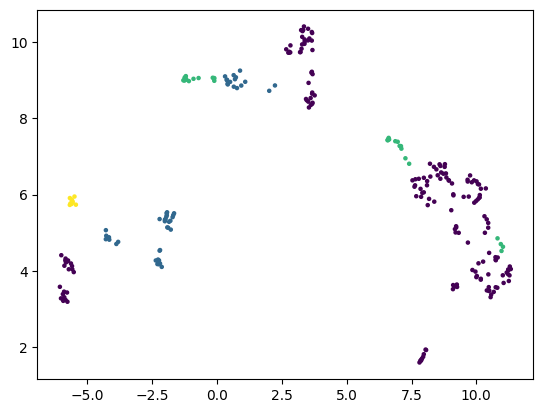

In [32]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Иерархическая кластеризация
agglomerative_clusterings = []
for n_clusters in range(2, 11):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    model.fit(X_scaled)
    agglomerative_clusterings.append(model)

# Оценка качества кластеризации
silhouette_scores = [silhouette_score(X_scaled, model.labels_) for model in agglomerative_clusterings]

# Построение графика метода локтя
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Индекс силуэта')
plt.show()

# Выбор лучшего алгоритма кластеризации
best_agglomerative_model = agglomerative_clusterings[np.argmax(silhouette_scores)]
print("Лучшее число кластеров для иерархической кластеризации:", best_agglomerative_model.n_clusters)

# Визуализация результатов кластеризации с помощью UMAP
reducer     =umap.UMAP()
embedding   =reducer.fit_transform(X_scaled)
plt.scatter(embedding[:, 0], embedding[:, 1], c=best_agglomerative_model.labels_, cmap='viridis', s=5)
plt.show()


In [59]:
import pandas as pd

bob = pd.read_csv(url_3)
color=list(bob)
bob=bob.replace("?",0)
bob=bob.dropna()

# for i in list(bob):
#     try:
#         bob[i]=bob[i].str.strip() 
#     except:
#         print(i)

# list_class=bob['class'].to_list()
# dict_class={}
# a=1
# for i in list_class: 
#     if i not in dict_class.keys():
#         dict_class[i]=a
#         a+=1

# bob=bob.dropna()
# bob['class']=bob['class'].apply(lambda x: dict_class[x] )  
# bob=bob.dropna()
# # np.array(bob['class'].to_list())


In [60]:
X=bob[list(bob)[2:]].astype(int).to_numpy()
y=bob[list(bob)[1]].astype(int).to_numpy()


In [63]:
len(y)

606

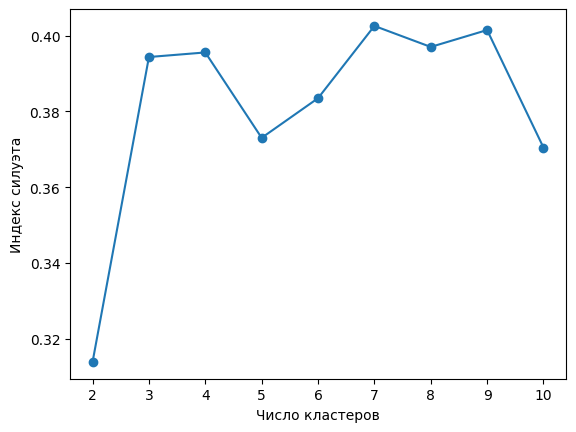

Лучшее число кластеров для иерархической кластеризации: 7


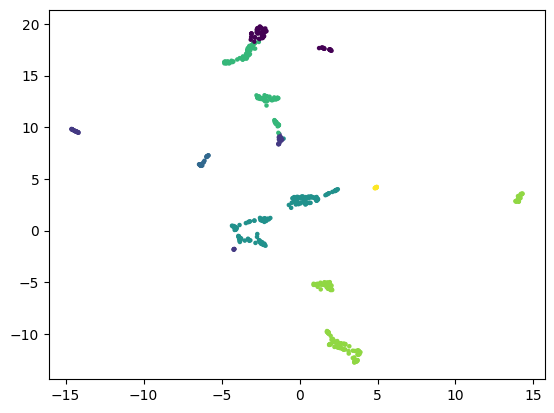

In [55]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Иерархическая кластеризация
agglomerative_clusterings = []
for n_clusters in range(2, 11):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    model.fit(X_scaled)
    agglomerative_clusterings.append(model)

# Оценка качества кластеризации
silhouette_scores = [silhouette_score(X_scaled, model.labels_) for model in agglomerative_clusterings]

# Построение графика метода локтя
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Индекс силуэта')
plt.show()

# Выбор лучшего алгоритма кластеризации
best_agglomerative_model = agglomerative_clusterings[np.argmax(silhouette_scores)]
print("Лучшее число кластеров для иерархической кластеризации:", best_agglomerative_model.n_clusters)

# Визуализация результатов кластеризации с помощью UMAP
reducer     =umap.UMAP()
embedding   =reducer.fit_transform(X_scaled)
plt.scatter(embedding[:, 0], embedding[:, 1], c=best_agglomerative_model.labels_, cmap='viridis', s=5)
plt.show()
